In [18]:
import sys  
sys.path.append("../../")
from LIB.utils import * 

In [19]:
train=pd.read_csv("../data/train_revised_11.09.2018 (1).zip")
test=pd.read_csv("../data/test_questions (1).csv")

Target=train.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()
train_df=train.drop_duplicates("ride_id").drop(['payment_method', 'payment_receipt', 'seat_number'],axis=1)
train_df=train_df.merge(Target,how="left",on="ride_id")

train_df.drop(["travel_to"],axis=1,inplace=True)
test.drop(["travel_to"],axis=1,inplace=True)
def add_20(x):
    date=x.split("-")
    date[-1]="20"+date[-1]
    return "-".join(date)
train_df["date"]=(train_df["travel_date"].apply(add_20)+" "+train_df["travel_time"]).astype(str)
test["date"]=(test["travel_date"]+" "+test["travel_time"]).astype(str)

def  time_features(x): 
    x["date"]=pd.to_datetime(x["date"],format='%d-%m-%Y %H:%M')
    x["dayofweek"]=x["date"].dt.dayofweek
    x["hour"]=x["date"].dt.hour
    x["minute"]=x["date"].dt.minute
 
    
    return x 
train_df=time_features(train_df)


def  time_features(x): 
    x["date"]=pd.to_datetime(x["date"],format='%Y-%m-%d %H:%M')
    x["dayofweek"]=x["date"].dt.dayofweek
    x["hour"]=x["date"].dt.hour
    x["minute"]=x["date"].dt.minute
  
    
    return x 
test=time_features(test)
train_df.date=train_df.date.dt.date

In [20]:
train_df.date.min()

datetime.date(2017, 10, 17)

In [21]:
test.date.dt.date.max(),test.date.dt.date.min()

(datetime.date(2018, 5, 9), datetime.date(2018, 4, 21))

In [22]:
print((test.date.max()-test.date.min()).days)
print(test.travel_from.nunique()*18)

18
270


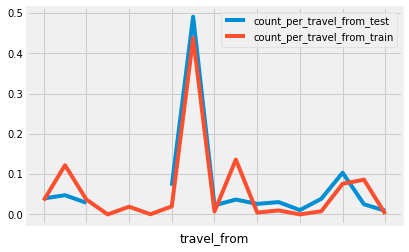

In [23]:
count=(train.groupby(["travel_from"]).ride_id.count().rename("count_per_travel_from_train")/len(train)).reset_index()
count["count_per_travel_from_test"]=count.travel_from.map(test.groupby(["travel_from"]).ride_id.count()/len(test))
count.plot(x="travel_from",y=["count_per_travel_from_test","count_per_travel_from_train"])

In [24]:
train_df["Date"]=train_df.date
test["Date"]=test.date.dt.date

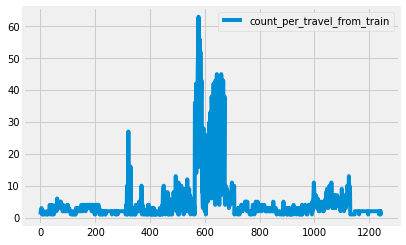

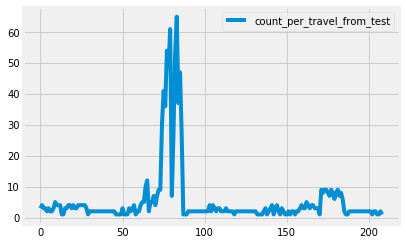

In [25]:
count=train_df.groupby(["travel_from","Date"]).ride_id.count().rename("count_per_travel_from_train").reset_index()
count.plot(y=["count_per_travel_from_train"])
count=test.groupby(["travel_from","Date"]).ride_id.count().rename("count_per_travel_from_test").reset_index()
count.plot(y=["count_per_travel_from_test"])


In [26]:
data=pd.concat([train_df,test])

In [27]:
data.hour.value_counts()

7     3683
10     764
8      675
6      586
9      557
5      547
19     267
23     142
11     139
Name: hour, dtype: int64

In [28]:
travel_from_with_shuttle=data[data.car_type=="shuttle"].travel_from.unique().tolist()
travel_from_with_bus=data[data.car_type=="Bus"].travel_from.unique().tolist()

In [29]:
travel_from=train_df.travel_from.unique()
for from_ in travel_from :
    fig, axes = plt.subplots(nrows=1, ncols=3)
    print(from_)
    from_df=train_df[train_df.travel_from==from_]
    from_df=from_df.groupby(["date","car_type"]).number_of_ticket.sum().rename("number_of_ticket").reset_index()
    from_df.plot(x="date",y="number_of_ticket",ax=axes[0],figsize=(20,10),style=".")
    from_df[from_df.car_type=="Bus"].plot(x="date",y="number_of_ticket",ax=axes[1],figsize=(20,10),style=".") 
    try : 
        from_df[from_df.car_type=="shuttle"].plot(x="date",y="number_of_ticket",ax=axes[2],figsize=(20,10),style=".")  
        plt.show()
    except : 
        print(from_)
        plt.show()

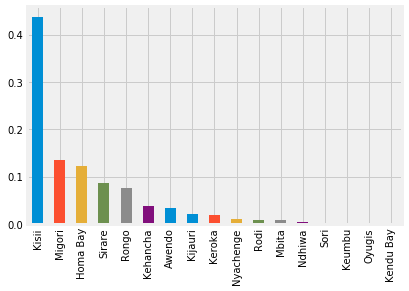

In [30]:
train.travel_from.value_counts(normalize=True).plot(kind="bar")

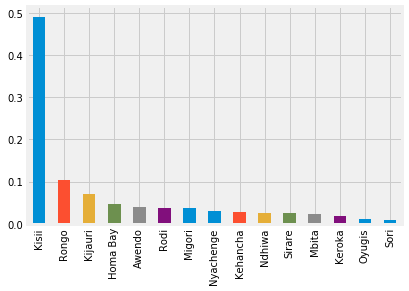

In [31]:
test.travel_from.value_counts(normalize=True).plot(kind="bar")

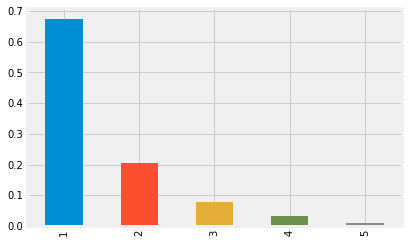

In [32]:
test.groupby("date").travel_from.count().value_counts(normalize=True).plot(kind="bar")

In [33]:
test.date.max()-test.date.min()

Timedelta('18 days 03:00:00')

In [34]:
set(train.travel_from)-set(test.travel_from)

{'Kendu Bay', 'Keumbu'}

In [35]:
set(test.travel_from)-set(train.travel_from)

set()

In [36]:
test["number_of_ticket"]=0

In [38]:
travel_from=test.travel_from.unique()
for from_ in travel_from :
    fig, axes = plt.subplots(nrows=1, ncols=2)
    print(from_)
    from_df=train_df[train_df.travel_from==from_]
    from_df=from_df.groupby(["date"]).number_of_ticket.count().rename("number_of_ticket").reset_index()
    from_df.plot(x="date",y="number_of_ticket",ax=axes[0],figsize=(20,10),style=".")
    from_df=test[test.travel_from==from_]
    from_df=from_df.groupby(["date"]).number_of_ticket.count().rename("number_of_ticket").reset_index()
    from_df.plot(x="date",y="number_of_ticket",ax=axes[0],figsize=(20,10),style=".")
    plt.show()

In [39]:
train_tavel_from_count_per_day=train_df.groupby(["date","travel_from"]).date.count().rename("count_per_day").reset_index()
test_tavel_from_count_per_day=test.groupby(["date","travel_from"]).date.count().rename("count_per_day").reset_index()

In [40]:
test_tavel_from_count_per_day.date=test_tavel_from_count_per_day.date.dt.date

In [41]:
train_time_range=pd.DataFrame()
train_time_range["date"]=pd.date_range(train_df.date.min(),train_df.date.max()).date
whol_date_train=[]
for direct in train_df.travel_from.unique() : 
    train_time_range["travel_from"]=direct
    whol_date_train.append(train_time_range.copy())
whol_date_train=pd.concat(whol_date_train)
whol_date_train=whol_date_train.merge(train_tavel_from_count_per_day,on=["travel_from","date"],how="left")
whol_date_train.fillna(0,inplace=True)
data_characterization(whol_date_train)

shape of data : (3162, 3)


,Columns name,Type,Count unique values,Count Nan values,Ratio Nan values,Unique values,Max,Min,Mean
0,date,object,186,0,0.0000,"[2017-10-17, 2017-10-18, 2017-10-19, 2017-10-2...",0.0000,0.0000,0.0000
1,travel_from,object,17,0,0.0000,"[Migori, Keroka, Homa Bay, Kisii, Keumbu, Rong...",0.0000,0.0000,0.0000
2,count_per_day,float64,48,0,0.0000,"[1.0, 0.0, 3.0, 2.0, 4.0, 5.0, 10.0, 27.0, 6.0...",63.0000,0.0000,1.9763


In [42]:
test_time_range=pd.DataFrame()
test_time_range["date"]=pd.date_range(test.date.min(),test.date.max()).date
whol_date_test=[]
for direct in test.travel_from.unique() : 
    test_time_range["travel_from"]=direct
    whol_date_test.append(test_time_range.copy())
whol_date_test=pd.concat(whol_date_test)
whol_date_test=whol_date_test.merge(test_tavel_from_count_per_day,on=["travel_from","date"],how="left")
whol_date_test.fillna(0,inplace=True)
data_characterization(whol_date_test)

shape of data : (1186, 3)


,Columns name,Type,Count unique values,Count Nan values,Ratio Nan values,Unique values,Max,Min,Mean
0,date,object,19,0,0.0000,"[2018-04-21, 2018-04-22, 2018-04-23, 2018-04-2...",0.0000,0.0000,0.0000
1,travel_from,object,15,0,0.0000,"[Kisii, Rongo, Sirare, Homa Bay, Rodi, Awendo,...",0.0000,0.0000,0.0000
2,count_per_day,float64,3,0,0.0000,"[1.0, 0.0, 2.0]",2.0000,0.0000,0.9368
